# Assessing isotopic analysis data for SIP microcosm soil samples submitted back in April of 2015

# Setting variables

In [1]:
import os
workDir = '/home/chantal/Chazy/data/Isotopic_analysis/'
dataFile = os.path.join(workDir, 'Chazy_IsotopicData.csv')
dataFile2 = os.path.join(workDir, '13C_gas.csv')

# Init

In [2]:
%load_ext rpy2.ipython

In [3]:
%%R
library(dplyr)
library(tidyr)
library(ggplot2)

/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 
Attaching package: ‘dplyr’


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from ‘package:stats’:

    filter, lag


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


  res = super(Function, self).__call__(*new_args, **new_kwargs)


# Loading/editing data table

In [4]:
%%R -i dataFile

df = read.csv(dataFile, sep=',', header = TRUE)
df = filter(df, !(is.na(mgC.mgSample)))
tail(df)

        Sample.ID    d13C X13C..at... C.Amount..ug. total_sample.mg.
19 13C-NTH-D32-R3  675.27     1.83846        617.25            25.40
20 13C-NTH-D32-R4 1460.04     2.67662        488.71            25.29
21 13C-PTH-D32-R1 2895.19     4.17295        309.97            25.19
22 13C-PTH-D32-R2 1266.24     2.47096        331.17            25.70
23 13C-PTH-D32-R3  755.84     1.92517        439.62            25.40
24 13C-PTH-D32-R4 1579.38     2.80282        439.62            25.51
   mgC.mgSample ug.C.13...mg.sample ug.C.13...mg.sample.derived.from.enrichment
19   0.02430118           0.4467675                                   0.1732814
20   0.01932424           0.5172364                                   0.3122391
21   0.01230528           0.5134932                                   0.3328517
22   0.01288599           0.3184077                                   0.1892019
23   0.01730787           0.3332060                                   0.1401227
24   0.01723324           0.4830167  

In [5]:
%%R -i dataFile2
#Importing gas file
df.gas = read.csv(dataFile2, sep=',', header = TRUE)
df.gas$Sample.ID = c('13C-PTH-D32-R1','13C-NTH-D32-R1','13C-PTH-D32-R2','13C-NTH-D32-R2','13C-PTH-D32-R3',
                     '13C-NTH-D32-R3','13C-PTH-D32-R4','13C-NTH-D32-R4','13X-PTH-D14-R1','13X-NTH-D14-R1',
                     '13X-PTH-D14-R2','13X-NTH-D14-R2','13X-PTH-D14-R3',
                     '13X-NTH-D14-R3','13X-PTH-D14-R4','13X-NTH-D14-R4' )
df.gas = df.gas %>% select(Sample.ID, CO2_cum__mg)
df.gas

        Sample.ID CO2_cum__mg
1  13C-PTH-D32-R1    2.843228
2  13C-NTH-D32-R1    3.056135
3  13C-PTH-D32-R2    2.681623
4  13C-NTH-D32-R2    2.949508
5  13C-PTH-D32-R3    2.519304
6  13C-NTH-D32-R3    2.575874
7  13C-PTH-D32-R4    2.431870
8  13C-NTH-D32-R4    2.903713
9  13X-PTH-D14-R1    2.335290
10 13X-NTH-D14-R1    2.424362
11 13X-PTH-D14-R2    2.168454
12 13X-NTH-D14-R2    2.666039
13 13X-PTH-D14-R3    2.192504
14 13X-NTH-D14-R3    2.607001
15 13X-PTH-D14-R4    2.166218
16 13X-NTH-D14-R4    2.541528


In [6]:
%%R
df = full_join(df, df.gas)
head(df)

/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Joining by: "Sample.ID"

  res = super(Function, self).__call__(*new_args, **new_kwargs)


       Sample.ID   d13C X13C..at... C.Amount..ug. total_sample.mg. mgC.mgSample
1 12C-NTH-D32-R1 -21.68     1.08189        505.80            25.14   0.02011933
2 12C-NTH-D32-R2 -23.13     1.08031        465.22            25.21   0.01845379
3 12C-NTH-D32-R3 -21.82     1.08174        640.90            25.35   0.02528205
4 12C-NTH-D32-R4 -22.40     1.08110        478.03            25.21   0.01896192
5 12C-PTH-D32-R1 -21.36     1.08224        428.97            25.70   0.01669144
6 12C-PTH-D32-R2 -20.52     1.08316        305.73            25.63   0.01192860
  ug.C.13...mg.sample ug.C.13...mg.sample.derived.from.enrichment total.ug.C
1           0.2176690                                           0          0
2           0.1993581                                           0          0
3           0.2734861                                           0          0
4           0.2049973                                           0          0
5           0.1806414                                  

In [7]:
%%R
tail(df)

        Sample.ID    d13C X13C..at... C.Amount..ug. total_sample.mg.
19 13C-NTH-D32-R3  675.27     1.83846        617.25            25.40
20 13C-NTH-D32-R4 1460.04     2.67662        488.71            25.29
21 13C-PTH-D32-R1 2895.19     4.17295        309.97            25.19
22 13C-PTH-D32-R2 1266.24     2.47096        331.17            25.70
23 13C-PTH-D32-R3  755.84     1.92517        439.62            25.40
24 13C-PTH-D32-R4 1579.38     2.80282        439.62            25.51
   mgC.mgSample ug.C.13...mg.sample ug.C.13...mg.sample.derived.from.enrichment
19   0.02430118           0.4467675                                   0.1732814
20   0.01932424           0.5172364                                   0.3122391
21   0.01230528           0.5134932                                   0.3328517
22   0.01288599           0.3184077                                   0.1892019
23   0.01730787           0.3332060                                   0.1401227
24   0.01723324           0.4830167  

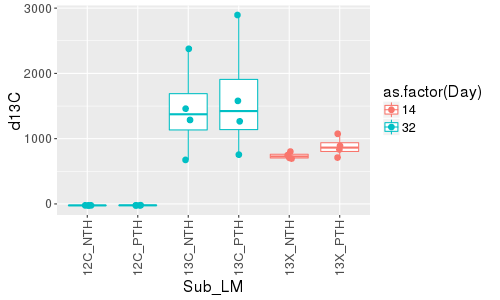

In [8]:
%%R -w 500 -h 300
df = filter(df, !(is.na(Day)))
ggplot(df, aes(Sub_LM, d13C, color=as.factor(Day))) +
    geom_boxplot() +
    geom_jitter(position = position_jitter(height=0, width=0.2), size=2.5) +
    theme(
        text = element_text(size=16),
        axis.text.x = element_text(angle=90, vjust=0.5)
    )

In [9]:
%%R
df$LM = relevel(df$LM, ref = 'PTH')

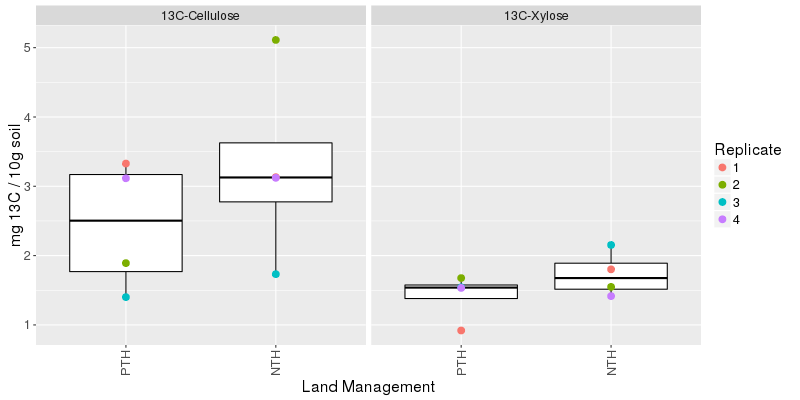

In [10]:
%%R -w 800 -h 400

df.no12 = filter(df, Substrate != '12C')

Substrate.names <- list(
  '13C'="13C-Cellulose",
    '13X'="13C-Xylose"
)

sub_labeller <- function(variable,value){
  return(Substrate.names[value])
}

ggplot(df.no12, aes(LM, total.mg.13C, color = as.factor(Replicate))) +
    geom_boxplot(color = 'black', outlier.size = 0) +
    geom_point(size=3) +
    theme(
        text = element_text(size=16),
        axis.text.x = element_text(angle=90, vjust=0.5)) + facet_grid(.~ Substrate, labeller=as_labeller(sub_labeller)) +
        xlab('Land Management') +
        ylab('mg 13C / 10g soil') + scale_color_discrete(name = 'Replicate')

In [11]:
%%R
sub_labeller(Substrate)

$`13C`
[1] "13C-Cellulose"

$`13X`
[1] "13C-Xylose"



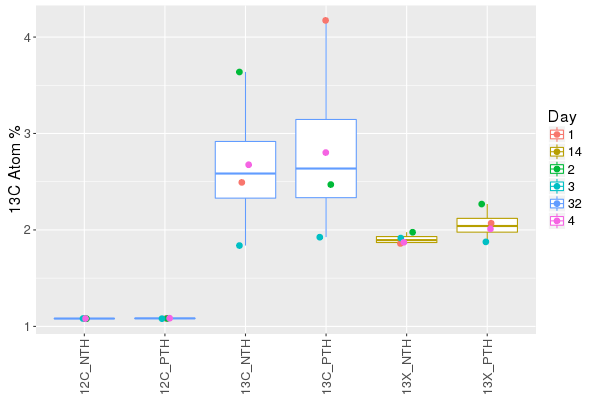

In [12]:
%%R -w 600 -h 400

ggplot(df, aes(Sub_LM, X13C..at...)) +
    geom_boxplot(aes(color = as.factor(Day))) +
    geom_jitter(aes(color = as.factor(Replicate)), position = position_jitter(height=0, width=0.2), size=2.5) +
    theme(
        text = element_text(size=16),
        axis.text.x = element_text(angle=90, vjust=0.5) 
    ) + scale_color_discrete(name = 'Day') + ylab('13C Atom %') + xlab(NULL)

In [13]:
%%R
tail(df)

        Sample.ID    d13C X13C..at... C.Amount..ug. total_sample.mg.
19 13C-NTH-D32-R3  675.27     1.83846        617.25            25.40
20 13C-NTH-D32-R4 1460.04     2.67662        488.71            25.29
21 13C-PTH-D32-R1 2895.19     4.17295        309.97            25.19
22 13C-PTH-D32-R2 1266.24     2.47096        331.17            25.70
23 13C-PTH-D32-R3  755.84     1.92517        439.62            25.40
24 13C-PTH-D32-R4 1579.38     2.80282        439.62            25.51
   mgC.mgSample ug.C.13...mg.sample ug.C.13...mg.sample.derived.from.enrichment
19   0.02430118           0.4467675                                   0.1732814
20   0.01932424           0.5172364                                   0.3122391
21   0.01230528           0.5134932                                   0.3328517
22   0.01288599           0.3184077                                   0.1892019
23   0.01730787           0.3332060                                   0.1401227
24   0.01723324           0.4830167  

In [14]:
%%R
df.13.soil = filter(df, Substrate != '12C') %>% select(Sample.ID, Replicate, total.mg.13C, Substrate, Day,
                                                  Replicate, Sub_LM, LM)
df.13.soil$mg13C = df.13.soil$total.mg.13C
df.13.soil$source = 'soil'
df.13.soil$total.mg.13C = NULL

df.13.gas = filter(df, Substrate != '12C') %>% select(Sample.ID, Replicate, CO2_cum__mg, Substrate, Day,
                                               Replicate, Sub_LM, LM)
df.13.gas$mg13C = df.13.gas$CO2_cum__mg
df.13.gas$source = 'CO2'
df.13.gas$CO2_cum__mg = NULL

df.13 = rbind(df.13.soil, df.13.gas)
head(df.13)

       Sample.ID Replicate Substrate Day  Sub_LM  LM    mg13C source
1 13X-NTH-D14-R1         1       13X  14 13X_NTH NTH 1.802534   soil
2 13X-NTH-D14-R2         2       13X  14 13X_NTH NTH 1.548683   soil
3 13X-NTH-D14-R3         3       13X  14 13X_NTH NTH 2.153888   soil
4 13X-NTH-D14-R4         4       13X  14 13X_NTH NTH 1.415802   soil
5 13X-PTH-D14-R1         1       13X  14 13X_PTH PTH 0.920019   soil
6 13X-PTH-D14-R2         2       13X  14 13X_PTH PTH 1.676552   soil


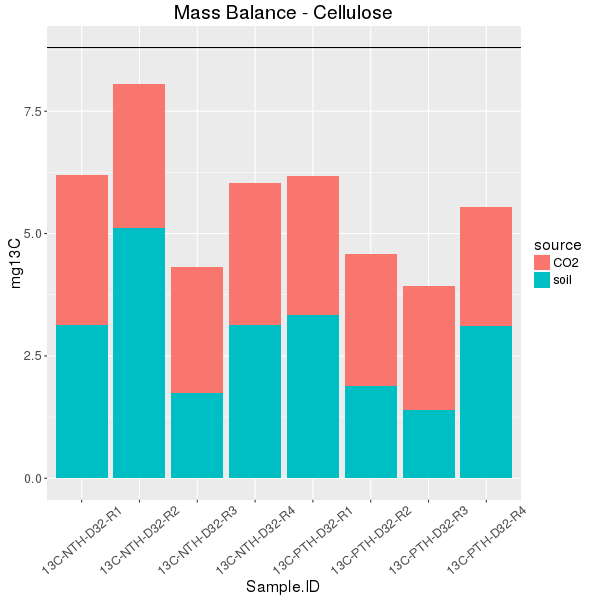

In [15]:
%%R -w 600 -h 600
df.13.C = filter(df.13, Substrate == '13C')
p = ggplot(df.13.C, aes(Sample.ID, mg13C))+
    geom_bar(aes(fill = source), stat = 'identity') + geom_hline(yintercept = 8.8) +
    theme(
        text = element_text(size=16),
        axis.text.x = element_text(angle=40, vjust=0.5)) + ggtitle("Mass Balance - Cellulose")

p

In [41]:
%%R
df.13.C.2 = df.13.C %>% spread(source, mg13C) 
df.13.C.2$total = df.13.C.2$CO2 + df.13.C.2$soil
df.13.C.2$added = 8.88

head(df.13.C.2)

       Sample.ID Replicate Substrate Day  Sub_LM  LM      CO2     soil    total
1 13C-NTH-D32-R1         1       13C  32 13C_NTH NTH 3.056135 3.131963 6.188098
2 13C-NTH-D32-R2         2       13C  32 13C_NTH NTH 2.949508 5.111567 8.061075
3 13C-NTH-D32-R3         3       13C  32 13C_NTH NTH 2.575874 1.732814 4.308688
4 13C-NTH-D32-R4         4       13C  32 13C_NTH NTH 2.903713 3.122391 6.026104
5 13C-PTH-D32-R1         1       13C  32 13C_PTH PTH 2.843228 3.328517 6.171745
6 13C-PTH-D32-R2         2       13C  32 13C_PTH PTH 2.681623 1.892019 4.573642
  added
1  8.88
2  8.88
3  8.88
4  8.88
5  8.88
6  8.88


In [44]:
%%R
df.C.N = filter(df.13.C.2, LM == 'NTH')
df.C.P = filter(df.13.C.2, LM == 'PTH')

t.test(df.C.N$total, df.C.N$added)


	Welch Two Sample t-test

data:  df.C.N$total and df.C.N$added
t = -3.5646, df = 3, p-value = 0.0377
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -5.1749287 -0.2930887
sample estimates:
mean of x mean of y 
 6.145991  8.880000 



In [45]:
%%R
df.C.N = filter(df.13.C.2, LM == 'NTH')
df.C.P = filter(df.13.C.2, LM == 'PTH')

t.test(df.C.P$total, df.C.P$added)


	Welch Two Sample t-test

data:  df.C.P$total and df.C.P$added
t = -7.6419, df = 3, p-value = 0.004653
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -5.420097 -2.233003
sample estimates:
mean of x mean of y 
  5.05345   8.88000 



In [16]:
%%R
missC = (df.13.C) %>% group_by(Sample.ID) %>% summarise(total13C = sum(mg13C))  %>% mutate(missingC = 8.8 - total13C) %>%
    arrange(missingC)
print(missC)
print(summary(missC$missingC))
print(sd(missC$missingC))


Source: local data frame [8 x 3]

       Sample.ID total13C  missingC
           (chr)    (dbl)     (dbl)
1 13C-NTH-D32-R2 8.061075 0.7389252
2 13C-NTH-D32-R1 6.188098 2.6119021
3 13C-PTH-D32-R1 6.171745 2.6282550
4 13C-NTH-D32-R4 6.026104 2.7738958
5 13C-PTH-D32-R4 5.547882 3.2521181
6 13C-PTH-D32-R2 4.573642 4.2263585
7 13C-NTH-D32-R3 4.308688 4.4913118
8 13C-PTH-D32-R3 3.920531 4.8794688
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.7389  2.6240  3.0130  3.2000  4.2930  4.8790 
[1] 1.333922


In [17]:
%%R
ggsave(p, file = 'data/figs/Cellulose_mass_balance.jpg', width=6, height=6)

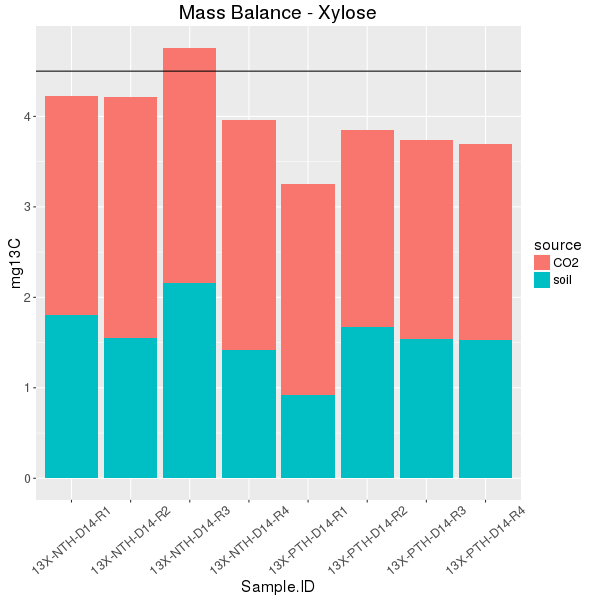

In [18]:
%%R -w 600 -h 600
df.13.X = filter(df.13, Substrate == '13X')
p = ggplot(df.13.X, aes(Sample.ID, mg13C))+
    geom_bar(aes(fill = source), stat = 'identity') + geom_hline(yintercept = 4.5) +
    theme(
        text = element_text(size=16),
        axis.text.x = element_text(angle=40, vjust=0.5)) + ggtitle("Mass Balance - Xylose")

p

In [37]:
%%R
df.13.X.2 = df.13.X %>% spread(source, mg13C) 
df.13.X.2$total = df.13.X.2$CO2 + df.13.X.2$soil
df.13.X.2$added = 4.5

head(df.13.X.2)

       Sample.ID Replicate Substrate Day  Sub_LM  LM      CO2     soil    total
1 13X-NTH-D14-R1         1       13X  14 13X_NTH NTH 2.424362 1.802534 4.226897
2 13X-NTH-D14-R2         2       13X  14 13X_NTH NTH 2.666039 1.548683 4.214722
3 13X-NTH-D14-R3         3       13X  14 13X_NTH NTH 2.607001 2.153888 4.760889
4 13X-NTH-D14-R4         4       13X  14 13X_NTH NTH 2.541528 1.415802 3.957330
5 13X-PTH-D14-R1         1       13X  14 13X_PTH PTH 2.335290 0.920019 3.255309
6 13X-PTH-D14-R2         2       13X  14 13X_PTH PTH 2.168454 1.676552 3.845006
  added
1   4.5
2   4.5
3   4.5
4   4.5
5   4.5
6   4.5


In [38]:
%%R
t.test(df.13.X.2$total, df.13.X.2$added)


	Welch Two Sample t-test

data:  df.13.X.2$total and df.13.X.2$added
t = -3.3965, df = 7, p-value = 0.0115
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.9126871 -0.1634723
sample estimates:
mean of x mean of y 
  3.96192   4.50000 



In [46]:
%%R
df.X.N = filter(df.13.X.2, LM == 'NTH')
df.X.P = filter(df.13.X.2, LM == 'PTH')

print(t.test(df.X.N$total, df.X.N$added))
print(t.test(df.X.P$total, df.X.P$added))


	Welch Two Sample t-test

data:  df.X.N$total and df.X.N$added
t = -1.2441, df = 3, p-value = 0.3018
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.7473424  0.3272610
sample estimates:
mean of x mean of y 
 4.289959  4.500000 


	Welch Two Sample t-test

data:  df.X.P$total and df.X.P$added
t = -6.667, df = 3, p-value = 0.00688
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.2795531 -0.4526842
sample estimates:
mean of x mean of y 
 3.633881  4.500000 



In [19]:

%%R
ggsave(p, file = 'data/figs/Xylose_mass_balance.jpg', width=6, height=6)

In [20]:
%%R
missC = (df.13.X) %>% group_by(Sample.ID) %>% summarise(total13C = sum(mg13C))  %>% mutate(missingC = 4.5 - total13C) %>%
    arrange(missingC)
print(missC)
print(summary(missC$missingC))
print(sd(missC$missingC))


Source: local data frame [8 x 3]

       Sample.ID total13C   missingC
           (chr)    (dbl)      (dbl)
1 13X-NTH-D14-R3 4.760889 -0.2608890
2 13X-NTH-D14-R1 4.226897  0.2731035
3 13X-NTH-D14-R2 4.214722  0.2852783
4 13X-NTH-D14-R4 3.957330  0.5426701
5 13X-PTH-D14-R2 3.845006  0.6549937
6 13X-PTH-D14-R3 3.735104  0.7648958
7 13X-PTH-D14-R4 3.700105  0.7998946
8 13X-PTH-D14-R1 3.255309  1.2446905
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.2609  0.2822  0.5988  0.5381  0.7736  1.2450 
[1] 0.4480838


In [21]:
%%R
head(df.13)

       Sample.ID Replicate Substrate Day  Sub_LM  LM    mg13C source
1 13X-NTH-D14-R1         1       13X  14 13X_NTH NTH 1.802534   soil
2 13X-NTH-D14-R2         2       13X  14 13X_NTH NTH 1.548683   soil
3 13X-NTH-D14-R3         3       13X  14 13X_NTH NTH 2.153888   soil
4 13X-NTH-D14-R4         4       13X  14 13X_NTH NTH 1.415802   soil
5 13X-PTH-D14-R1         1       13X  14 13X_PTH PTH 0.920019   soil
6 13X-PTH-D14-R2         2       13X  14 13X_PTH PTH 1.676552   soil


In [22]:
%%R
head(df.13)

df.plot = df.13 %>% group_by(Substrate, source, LM) %>% summarise(mean_mg13C = mean(mg13C), sd_mg13C = sd(mg13C))
head(df.plot)

Source: local data frame [6 x 5]
Groups: Substrate, source [3]

  Substrate source     LM mean_mg13C   sd_mg13C
     (fctr)  (chr) (fctr)      (dbl)      (dbl)
1       13C    CO2    PTH   2.619006 0.18180238
2       13C    CO2    NTH   2.871308 0.20704898
3       13C   soil    PTH   2.434444 0.93553267
4       13C   soil    NTH   3.274684 1.38985160
5       13X    CO2    PTH   2.215617 0.08066509
6       13X    CO2    NTH   2.559733 0.10358881


In [23]:
%%R
df.plot = df.plot %>% ungroup() %>% arrange(Substrate, LM)

In [24]:
%%R
(df.plot)

Source: local data frame [8 x 5]

  Substrate source     LM mean_mg13C   sd_mg13C
     (fctr)  (chr) (fctr)      (dbl)      (dbl)
1       13C    CO2    PTH   2.619006 0.18180238
2       13C   soil    PTH   2.434444 0.93553267
3       13C    CO2    NTH   2.871308 0.20704898
4       13C   soil    NTH   3.274684 1.38985160
5       13X    CO2    PTH   2.215617 0.08066509
6       13X   soil    PTH   1.418265 0.33852086
7       13X    CO2    NTH   2.559733 0.10358881
8       13X   soil    NTH   1.730227 0.32482736


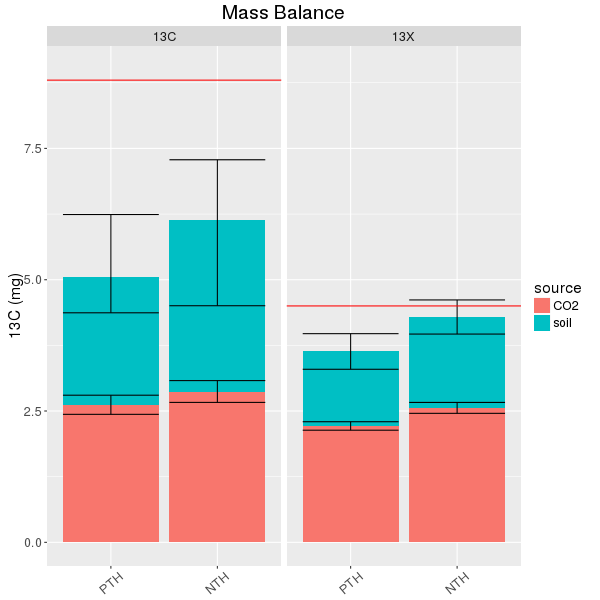

In [25]:
%%R -w 600 -h 600

#df.plot[df.plot$source == 'soil', 'mean_mg13C']

starting_point = as.data.frame(c(0, 2.871308,0, 2.619006,0,2.215617, 0, 2.559733))
ending_point = as.data.frame(c(0, 2.871308,0, 2.619006,0,2.215617 ,0,2.559733 ))

s = as.data.frame(df.plot$mean_mg13C - df.plot$sd_mg13C) 
e = as.data.frame(df.plot$mean_mg13C + df.plot$sd_mg13C)

start = s + starting_point 
end = e + ending_point

colnames(start) = 'start'
colnames(end) = 'end'

p = ggplot(df.plot, aes(LM, mean_mg13C)) +
    geom_bar(aes(fill = source), stat = 'identity') + 
   geom_errorbar(ymin = start$start, ymax = end$end) +
    theme(
        text = element_text(size=16),
        axis.text.x = element_text(angle=40, vjust=0.5)) + ggtitle("Mass Balance") + 
    facet_wrap(~Substrate, ncol = 2) + xlab(NULL) + ylim(0,9) + ylab('13C (mg)')


hline.data <- data.frame(z = c(8.8, 4.5), Substrate = c("13C","13X")) 
p = p + geom_hline(aes(yintercept = z), hline.data, color = 'red')

p

        

In [26]:
%%R
ggsave(p, file = 'data/figs/Summative_MassBalance.jpg', width=6, height=6)

In [27]:
%%R
head(df)

       Sample.ID   d13C X13C..at... C.Amount..ug. total_sample.mg. mgC.mgSample
1 12C-NTH-D32-R1 -21.68     1.08189        505.80            25.14   0.02011933
2 12C-NTH-D32-R2 -23.13     1.08031        465.22            25.21   0.01845379
3 12C-NTH-D32-R3 -21.82     1.08174        640.90            25.35   0.02528205
4 12C-NTH-D32-R4 -22.40     1.08110        478.03            25.21   0.01896192
5 12C-PTH-D32-R1 -21.36     1.08224        428.97            25.70   0.01669144
6 12C-PTH-D32-R2 -20.52     1.08316        305.73            25.63   0.01192860
  ug.C.13...mg.sample ug.C.13...mg.sample.derived.from.enrichment total.ug.C
1           0.2176690                                           0          0
2           0.1993581                                           0          0
3           0.2734861                                           0          0
4           0.2049973                                           0          0
5           0.1806414                                  

In [59]:
%%R
df.filt = filter(df, Substrate == '13C') %>% arrange(LM)
test = t.test(df.filt$total.mg.13C ~ df.filt$LM, paired = TRUE)
test


	Paired t-test

data:  df.filt$total.mg.13C by df.filt$LM
t = -1.0496, df = 3, p-value = 0.371
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.38787  1.70739
sample estimates:
mean of the differences 
               -0.84024 



In [60]:
%%R
df.filt = filter(df, Substrate == '13X') %>% arrange(LM)
test = t.test(df.filt$total.mg.13C ~ df.filt$LM, paired = TRUE)
test


	Paired t-test

data:  df.filt$total.mg.13C by df.filt$LM
t = -1.2131, df = 3, p-value = 0.3119
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.1303314  0.5064075
sample estimates:
mean of the differences 
             -0.3119619 



In [54]:
%%R
df.filt = filter(df, Substrate != '12C') %>% arrange(LM)
test = aov(df.filt$total.mg.13C ~ df.filt$Substrate + df.filt$Replicate, p.adj = "BH")#, paired = TRUE)
summary(test)

                  Df Sum Sq Mean Sq F value Pr(>F)  
df.filt$Substrate  1  6.557   6.557   8.084 0.0138 *
df.filt$Replicate  1  0.143   0.143   0.176 0.6814  
Residuals         13 10.545   0.811                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [51]:
%%R
df.filt = filter(df, Substrate != '12C') %>% arrange(LM)
test = aov(df.filt$total.mg.13C ~ df.filt$Sub_LM + df.filt$Replicate, p.adj = "BH")#, paired = TRUE)
summary(test)

                  Df Sum Sq Mean Sq F value Pr(>F)  
df.filt$Sub_LM     3  8.164  2.7212   3.349 0.0593 .
df.filt$Replicate  1  0.143  0.1431   0.176 0.6828  
Residuals         11  8.938  0.8125                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [52]:
%%R
TukeyHSD(test)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = df.filt$total.mg.13C ~ df.filt$Sub_LM + df.filt$Replicate, p.adj = "BH")

$`df.filt$Sub_LM`
                      diff       lwr        upr     p adj
13C_PTH-13C_NTH -0.8402400 -2.758510 1.07802998 0.5709977
13X_NTH-13C_NTH -1.5444571 -3.462727 0.37381297 0.1297558
13X_PTH-13C_NTH -1.8564190 -3.774689 0.06185103 0.0587313
13X_NTH-13C_PTH -0.7042170 -2.622487 1.21405301 0.6940734
13X_PTH-13C_PTH -1.0161790 -2.934449 0.90209107 0.4203199
13X_PTH-13X_NTH -0.3119619 -2.230232 1.60630809 0.9598449



In [30]:
%%R
head(df.filt)

       Sample.ID    d13C X13C..at... C.Amount..ug. total_sample.mg.
1 13X-PTH-D14-R1  891.15     2.07045        333.29            25.31
2 13X-PTH-D14-R2 1076.35     2.26861        333.29            25.47
3 13X-PTH-D14-R3  710.77     1.87668        463.08            25.02
4 13X-PTH-D14-R4  835.41     2.01066        411.93            25.50
5 13C-PTH-D32-R1 2895.19     4.17295        309.97            25.19
6 13C-PTH-D32-R2 1266.24     2.47096        331.17            25.70
  mgC.mgSample ug.C.13...mg.sample ug.C.13...mg.sample.derived.from.enrichment
1   0.01316831           0.2726433                                   0.0920019
2   0.01308559           0.2968610                                   0.1676552
3   0.01850839           0.3473433                                   0.1542600
4   0.01615412           0.3248044                                   0.1533888
5   0.01230528           0.5134932                                   0.3328517
6   0.01288599           0.3184077                

In [31]:
%%R
pairwise.t.test(df.filt$total.mg.13C, df.filt$Sub_LM, p.adjust.method = 'BH')#,
                #paired = TRUE)


	Pairwise comparisons using t tests with pooled SD 

data:  df.filt$total.mg.13C and df.filt$Sub_LM 

        13C_NTH 13C_PTH 13X_NTH
13C_PTH 0.296   -       -      
13X_NTH 0.082   0.330   -      
13X_PTH 0.064   0.249   0.621  

P value adjustment method: BH 


In [32]:
%%R
df.cell = filter(df, Substrate == '13C')
df.cell$perc_left_soil = df.cell$total.mg.13C / 8.8 *100
df.cell$perc_CO2 = df.cell$CO2_cum__mg / 8.8 *100

df.xyl = filter(df, Substrate == '13X')
df.xyl$perc_left_soil = df.xyl$total.mg.13C / 4.5 *100
df.xyl$perc_CO2 = df.xyl$CO2_cum__mg / 4.5 *100

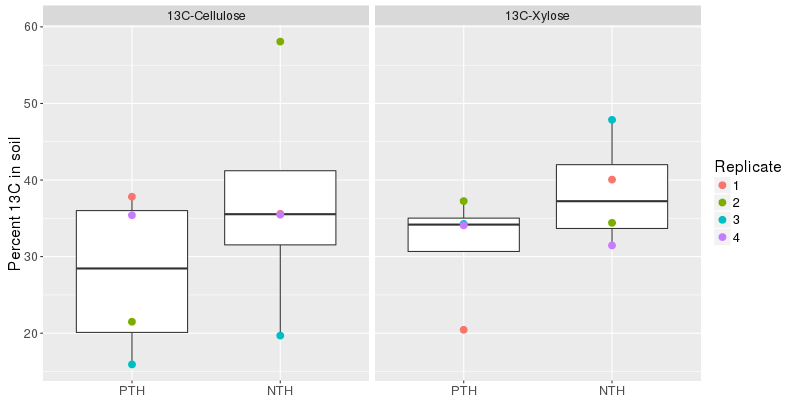

In [33]:
%%R -w 800 -h 400

df.perc.total = rbind(df.cell, df.xyl)

ggplot(df.perc.total, aes(x = LM, y = perc_left_soil)) +
    geom_boxplot() +
    geom_point(aes(color = as.factor(Replicate)), size = 3) +
    facet_grid(~Substrate, labeller=as_labeller(sub_labeller))+ 
    xlab(NULL) + ylab('Percent 13C in soil') + scale_color_discrete(name = 'Replicate') +
    theme(
        text = element_text(size=16),
        axis.text.x = element_text(vjust=0.5))

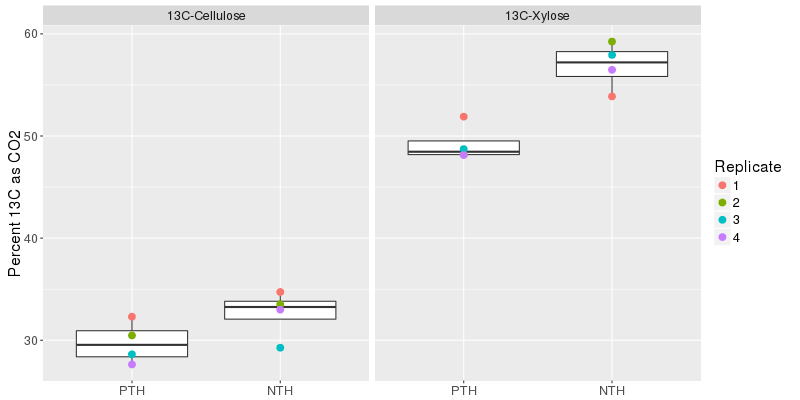

In [34]:
%%R -w 800 -h 400

df.perc.total = rbind(df.cell, df.xyl)

ggplot(df.perc.total, aes(x = LM, y = perc_CO2)) +
    geom_boxplot() +
    geom_point(aes(color = as.factor(Replicate)), size = 3) +
    facet_grid(~Substrate, labeller=as_labeller(sub_labeller))+ 
    xlab(NULL) + ylab('Percent 13C as CO2') + scale_color_discrete(name = 'Replicate') +
    theme(
        text = element_text(size=16),
        axis.text.x = element_text(vjust=0.5))